In [1]:
import pyTSPA
import warnings
warnings.filterwarnings("ignore")

#### `result_stats` test

In [2]:
df = pyTSPA.load_match_data("Football_ENG_2017_18.xlsx")
print(pyTSPA.result_stats(df))

{'Home Wins': 890, 'Draws': 539, 'Away Wins': 607}


#### `team_performance` test

In [3]:
print(pyTSPA.team_performance(df, "Arsenal"))

{'Team': 'Arsenal', 'Matches': 38, 'Wins': 19, 'Draws': 6, 'Losses': 13, 'Goals For': 74, 'Goals Against': 51, 'Goal Difference': 23, 'Points': 63}


#### `get_all_teams` test

In [4]:
print(pyTSPA.get_all_teams(df))

['AFC Wimbledon' 'Accrington' 'Arsenal' 'Aston Villa' 'Barnet' 'Barnsley'
 'Birmingham' 'Blackburn' 'Blackpool' 'Bolton' 'Bournemouth' 'Bradford'
 'Brentford' 'Brighton' 'Bristol City' 'Bristol Rvs' 'Burnley' 'Burton'
 'Bury' 'Cambridge' 'Cardiff' 'Carlisle' 'Charlton' 'Chelsea' 'Cheltenham'
 'Chesterfield' 'Colchester' 'Coventry' 'Crawley Town' 'Crewe'
 'Crystal Palace' 'Derby' 'Doncaster' 'Everton' 'Exeter' 'Fleetwood Town'
 'Forest Green' 'Fulham' 'Gillingham' 'Grimsby' 'Huddersfield' 'Hull'
 'Ipswich' 'Leeds' 'Leicester' 'Lincoln' 'Liverpool' 'Luton' 'Man City'
 'Man United' 'Mansfield' 'Middlesbrough' 'Millwall' 'Milton Keynes Dons'
 'Morecambe' 'Newcastle' 'Newport County' 'Northampton' 'Norwich'
 "Nott'm Forest" 'Notts County' 'Oldham' 'Oxford' 'Peterboro' 'Plymouth'
 'Port Vale' 'Portsmouth' 'Preston' 'QPR' 'Reading' 'Rochdale' 'Rotherham'
 'Scunthorpe' 'Sheffield United' 'Sheffield Weds' 'Shrewsbury'
 'Southampton' 'Southend' 'Stevenage' 'Stoke' 'Sunderland' 'Swansea'
 'Swindo

#### `each_team_performance` test

In [5]:
team_stats=pyTSPA.each_team_performance(df)
team_stats

,Team,Matches,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points
0,Man City,38,32,4,2,106,27,79,100
1,Wolves,46,30,9,7,82,39,43,99
2,Wigan,46,29,11,6,89,29,60,98
3,Blackburn,46,28,12,6,82,40,42,96
4,Accrington,46,29,6,11,76,46,30,93
...,...,...,...,...,...,...,...,...,...
87,Southampton,38,7,15,16,37,56,-19,36
88,Bury,46,8,12,26,41,71,-30,36
89,Swansea,38,8,9,21,28,56,-28,33
90,Stoke,38,7,12,19,35,68,-33,33


#### `win_percentage` test

In [6]:
print(pyTSPA.win_percentage(df, "Stoke"))

0.18421052631578946


#### `each_win_percentage` test

In [7]:
wpc=pyTSPA.each_win_percentage(df)
wpc

,Team,WinPercentage
0,Arsenal,0.500000
1,Brighton,0.236842
2,Chelsea,0.552632
3,Crystal Palace,0.289474
4,Everton,0.342105
...,...,...
87,Notts County,0.456522
88,Port Vale,0.239130
89,Swindon,0.434783
90,Yeovil,0.260870


#### `pythagorean_expectation` test

In [8]:
print(pyTSPA.pythagorean_expectation(df, "Stoke"))

0.20943751068558727


#### `each_pythagorean_expectation` test

In [9]:
pyth=pyTSPA.each_pythagorean_expectation(df)
pyth

,Team,PythagoreanExpectation
0,Arsenal,0.677974
1,Brighton,0.283890
2,Chelsea,0.726929
3,Crystal Palace,0.400990
4,Everton,0.365283
...,...,...
87,Notts County,0.686317
88,Port Vale,0.348476
89,Swindon,0.515148
90,Yeovil,0.382275


### Pythagorean Expectation Analysis

The Pythagorean Expectation is a metric that estimates a team's expected winning percentage based on the number of goals scored and conceded. 

- It is particularly useful in identifying teams that are overperforming or underperforming relative to their scoring and conceding patterns.
- A higher Pythagorean Expectation indicates that a team is more likely to win based on its goal-scoring and defensive performance.
- By comparing the actual win percentage to the Pythagorean Expectation, we can assess whether a team is performing as expected or deviating significantly.

In the plots below, we visualize the correlation between the Pythagorean Expectation and both the actual win percentage and the total number of wins for each team.

<Figure size 1000x600 with 0 Axes>

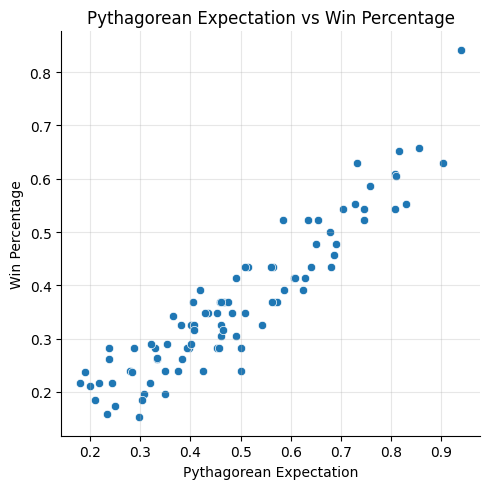

<Figure size 1000x600 with 0 Axes>

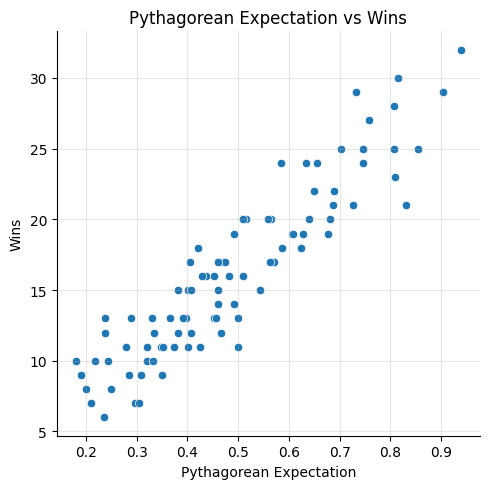

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

team_stats = pd.merge(team_stats, wpc, on='Team', how='left')
team_stats = pd.merge(team_stats, pyth, on='Team', how='left')

# Pythagorean Expectation vs Win Percentage
plt.figure(figsize=(10, 6))
sns.relplot(x="PythagoreanExpectation", y="WinPercentage", data=team_stats)
plt.title("Pythagorean Expectation vs Win Percentage")
plt.xlabel("Pythagorean Expectation")
plt.ylabel("Win Percentage")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Pythagorean Expectation vs Wins
plt.figure(figsize=(10, 6))
sns.relplot(x="PythagoreanExpectation", y="Wins", data=team_stats)
plt.title("Pythagorean Expectation vs Wins")
plt.xlabel("Pythagorean Expectation")
plt.ylabel("Wins")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Machine Learning Functions in metrics.py

The `metrics.py` module includes two machine learning-based functions that predict football match outcomes using logistic regression. These functions provide a data-driven approach to analyzing team performance and predicting future match results.

---

## Logistic Regression Prediction

### `logistic_regression_prediction(df: pd.DataFrame) -> dict`

- **Purpose:**  
  Predicts match outcomes (`Home Win`, `Draw`, `Away Win`) using a multinomial logistic regression model based on:
  - Home and Away Win Percentage
  - Home and Away Pythagorean Expectation
  - Goal Difference

- **Output:**  
  - Model accuracy and confusion matrix
  - Predicted outcomes for the test set
  - Trained model for future predictions

---

## Match Outcome Prediction

### `predict_match_outcome(home_team: str, away_team: str, model: LogisticRegression, df: pd.DataFrame) -> dict`

- **Purpose:**  
  Predicts the outcome and associated probabilities for a specific match using the trained logistic regression model.

- **Output:**  
  - Predicted outcome (`Home Win`, `Draw`, `Away Win`)
  - Probability distribution for each outcome

---

These functions extend the existing statistical analysis capabilities of `metrics.py`, allowing for more advanced predictions based on historical data.

#### `logistic_regression_prediction` test

In [11]:
print(pyTSPA.logistic_regression_prediction(df))

{'accuracy': 0.5156054931335831, 'confusion_matrix': [[150, 61, 58], [94, 111, 63], [60, 52, 152]], 'predictions':      Home_WinPercentage  Away_WinPercentage  Home_PythagoreanExpectation  \
0              0.014596            0.342956                     0.387980   
1              0.999678           -0.391535                     1.033241   
2             -0.149585           -0.149585                    -0.056971   
3              0.342956            1.163859                     0.755985   
4              0.671317            0.014596                     1.079761   
..                  ...                 ...                          ...   
796           -0.590280           -1.584003                    -0.957558   
797            1.984761            0.342956                     2.293692   
798            0.014596           -1.298848                    -0.185473   
799            0.507137           -0.149585                     0.821489   
800           -0.642126            1.984761      

#### `predict_match_outcome` test

In [12]:
result = pyTSPA.logistic_regression_prediction(df)
model = result["model"]
prediction = pyTSPA.predict_match_outcome("Arsenal", "Stoke", model, df)
print(prediction)

{'predicted_outcome': 'Home Win', 'probabilities': {'Home Win': 0.38, 'Draw': 0.37, 'Away Win': 0.25}}


# Season Half Prediction - Pythagorean Expectation Analysis

The `season_half_prediction()` function in `metrics.py` uses the Pythagorean Expectation metric to predict the outcomes of the second half of the season based on the performance in the first half.

---

## Purpose:
- To estimate the likely outcomes (`Home Win`, `Draw`, `Away Win`) of matches in the second half of the season using the Pythagorean Expectation values calculated from the first half.
- Provides a simple, data-driven approach to identifying potential match outcomes without advanced machine learning.

---

## Implementation:
- The dataset is split into two halves based on the match dates.
- The Pythagorean Expectation values are calculated for all teams using only the first half of the season.
- These values are then applied to the second half of the season, comparing the `Home` and `Away` Pythagorean Expectation values to predict the match outcome.

---

## Output:
- `PredictedOutcome`: Predicted match outcome (`Home Win`, `Draw`, `Away Win`) based on the Pythagorean Expectation comparison.
- The function provides a simple but effective method for evaluating team strength and predicting potential match results using only statistical metrics.

---

#### `season_half_prediction` test

In [15]:
pyTSPA.clean_data(df)
prediction=pyTSPA.season_half_prediction(df)
prediction

,Date,HomeTeam,AwayTeam,FTR,Home_PythagoreanExpectation,Away_PythagoreanExpectation,PredictedOutcome
0,2017-12-26,Liverpool,Swansea,H,0.760633,0.151819,Home Win
1,2017-12-26,Man United,Burnley,D,0.895578,0.532225,Home Win
2,2017-12-26,Bradford,Peterboro,A,0.623077,0.568173,Home Win
3,2017-12-26,West Brom,Everton,D,0.211892,0.390244,Away Win
4,2017-12-26,Watford,Leicester,H,0.386737,0.517538,Away Win
...,...,...,...,...,...,...,...
1013,2018-11-04,Wolves,Derby,H,0.864827,0.766048,Home Win
1014,2018-12-01,Sheffield United,Sheffield Weds,D,0.606458,0.464331,Home Win
1015,2018-12-02,Chelsea,West Brom,H,0.855030,0.211892,Home Win
1016,2018-12-03,Stoke,Man City,A,0.239367,0.961538,Away Win
